ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik
Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?

* Country - Ülke
* Region - Bölge	
* Happiness Rank - Mutluluk Seviyesi	
* Happiness Score	- Mutluluk Skoru
* Economy (GDP per Capita)	- Ekonomik üretim
* Family	- aile
* Health (Life Expectancy) - yaşam beklentisi	
* Freedom	- özgürlük
* Trust (Government Corruption) - yolsuzluk	olmaması
* Generosity	- cömertlik

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [211]:
df_2015 = pd.read_csv('./data/2015.csv')
df_2015 .head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [212]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_2015)

##################### Shape #####################
(158, 12)
##################### Types #####################
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
##################### Head #####################
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   


In [213]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [214]:
columns_to_drop = ["Standard Error","Dystopia Residual"]
df_2015 = df_2015.drop(columns=columns_to_drop)
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [215]:
df_2016 = pd.read_csv('./data/2016.csv')
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [216]:
check_df(df_2016)

#ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik 

##################### Shape #####################
(157, 13)
##################### Types #####################
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object
##################### Head #####################
       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Eu

In [217]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [218]:
columns_to_drop = ['Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual']
df_2016 = df_2016.drop(columns=columns_to_drop)

In [219]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [220]:
df_2017 = pd.read_csv('./data/2017.csv')
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


#### Remove '.' in columns 

In [221]:
dummy = df_2017
keys=dummy.columns
values=[]
for k in keys:
    k = k.replace('.',' ')
    values.append(k)
dict_columns = zip(keys,values)
df_2017=dummy.rename(columns=dict(dict_columns))
df_2017.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy  GDP per Capita ', 'Family',
       'Health  Life Expectancy ', 'Freedom', 'Generosity',
       'Trust  Government Corruption ', 'Dystopia Residual'],
      dtype='object')

In [222]:
columns_to_drop = ["Whisker high","Whisker low","Dystopia Residual"]
df_2017 = df_2017.drop(columns=columns_to_drop)

In [223]:
df_2017.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy  GDP per Capita ', 'Family', 'Health  Life Expectancy ',
       'Freedom', 'Generosity', 'Trust  Government Corruption '],
      dtype='object')

In [224]:
check_df(df_2017)

##################### Shape #####################
(155, 9)
##################### Types #####################
Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy  GDP per Capita          float64
Family                           float64
Health  Life Expectancy          float64
Freedom                          float64
Generosity                       float64
Trust  Government Corruption     float64
dtype: object
##################### Head #####################
       Country  Happiness Rank  Happiness Score  Economy  GDP per Capita   \
0       Norway               1            7.537                  1.616463   
1      Denmark               2            7.522                  1.482383   
2      Iceland               3            7.504                  1.480633   
3  Switzerland               4            7.494                  1.564980   
4      Finland               5            7.469                  1.443572 

In [225]:
df_2018 = pd.read_csv('./data/2018.csv')
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [226]:
check_df(df_2018)

##################### Shape #####################
(156, 9)
##################### Types #####################
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object
##################### Head #####################
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy 

In [227]:
df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [228]:
df_2019 = pd.read_csv('./data/2019.csv')
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [229]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [230]:
check_df(df_2019)

##################### Shape #####################
(156, 9)
##################### Types #####################
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object
##################### Head #####################
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy 

In [231]:
df_list = [df_2015.drop(columns=["Region"]), df_2016.drop(columns=["Region"]), df_2017, df_2018, df_2019]

In [232]:
for df in df_list:
    print("Feature Count")
    print(df.columns)
    print("-----------------------------")

Feature Count
Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')
-----------------------------
Feature Count
Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')
-----------------------------
Feature Count
Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy  GDP per Capita ', 'Family', 'Health  Life Expectancy ',
       'Freedom', 'Generosity', 'Trust  Government Corruption '],
      dtype='object')
-----------------------------
Feature Count
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corrupt

In [233]:
df_column_old = df_list[0].columns
df_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity']
df_list[0] = df_list[0].rename(columns=dict(zip(df_column_old,df_column_new)))
df_list[0]["Year"] = 2015
df_list[0].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

In [234]:
df_column_old = df_list[1].columns
df_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Trust', 'Generosity']
df_list[1] = df_list[1].rename(columns=dict(zip(df_column_old,df_column_new)))
df_list[1]["Year"] = 2016
df_list[1].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

In [235]:
df_column_old = df_list[2].columns
df_column_new = ['Country', 'Rank', 'Score','Economy', 'Family', 'Health','Freedom', 'Generosity','Trust']
df_list[2] = df_list[2].rename(columns=dict(zip(df_column_old,df_column_new)))
df_list[2]["Year"] = 2017
df_list[2].columns

Index(['Country', 'Rank', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Generosity', 'Trust', 'Year'],
      dtype='object')

In [236]:
df_column_old = df_list[3].columns
df_column_new = [ 'Rank','Country', 'Score','Economy', 'Family', 'Health','Freedom', 'Generosity','Trust']
df_list[3] = df_list[3].rename(columns=dict(zip(df_column_old,df_column_new)))
df_list[3]["Year"] = 2018
df_list[3].columns

Index(['Rank', 'Country', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Generosity', 'Trust', 'Year'],
      dtype='object')

In [237]:
df_column_old = df_list[4].columns
df_column_new = [ 'Rank','Country', 'Score','Economy', 'Family', 'Health','Freedom', 'Generosity','Trust']
df_list[4] = df_list[4].rename(columns=dict(zip(df_column_old,df_column_new)))
df_list[4]["Year"] = 2019
df_list[4].columns

Index(['Rank', 'Country', 'Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Generosity', 'Trust', 'Year'],
      dtype='object')

In [238]:
df = pd.concat(df_list, axis=0).reset_index(drop=True)
df.head()

,Country,Rank,Score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [239]:
check_df(df)

##################### Shape #####################
(782, 10)
##################### Types #####################
Country        object
Rank            int64
Score         float64
Economy       float64
Family        float64
Health        float64
Freedom       float64
Trust         float64
Generosity    float64
Year            int64
dtype: object
##################### Head #####################
       Country  Rank  Score  Economy   Family   Health  Freedom    Trust  \
0  Switzerland     1  7.587  1.39651  1.34951  0.94143  0.66557  0.41978   
1      Iceland     2  7.561  1.30232  1.40223  0.94784  0.62877  0.14145   
2      Denmark     3  7.527  1.32548  1.36058  0.87464  0.64938  0.48357   
3       Norway     4  7.522  1.45900  1.33095  0.88521  0.66973  0.36503   
4       Canada     5  7.427  1.32629  1.32261  0.90563  0.63297  0.32957   

   Generosity  Year  
0     0.29678  2015  
1     0.43630  2015  
2     0.34139  2015  
3     0.34699  2015  
4     0.45811  2015  
##################

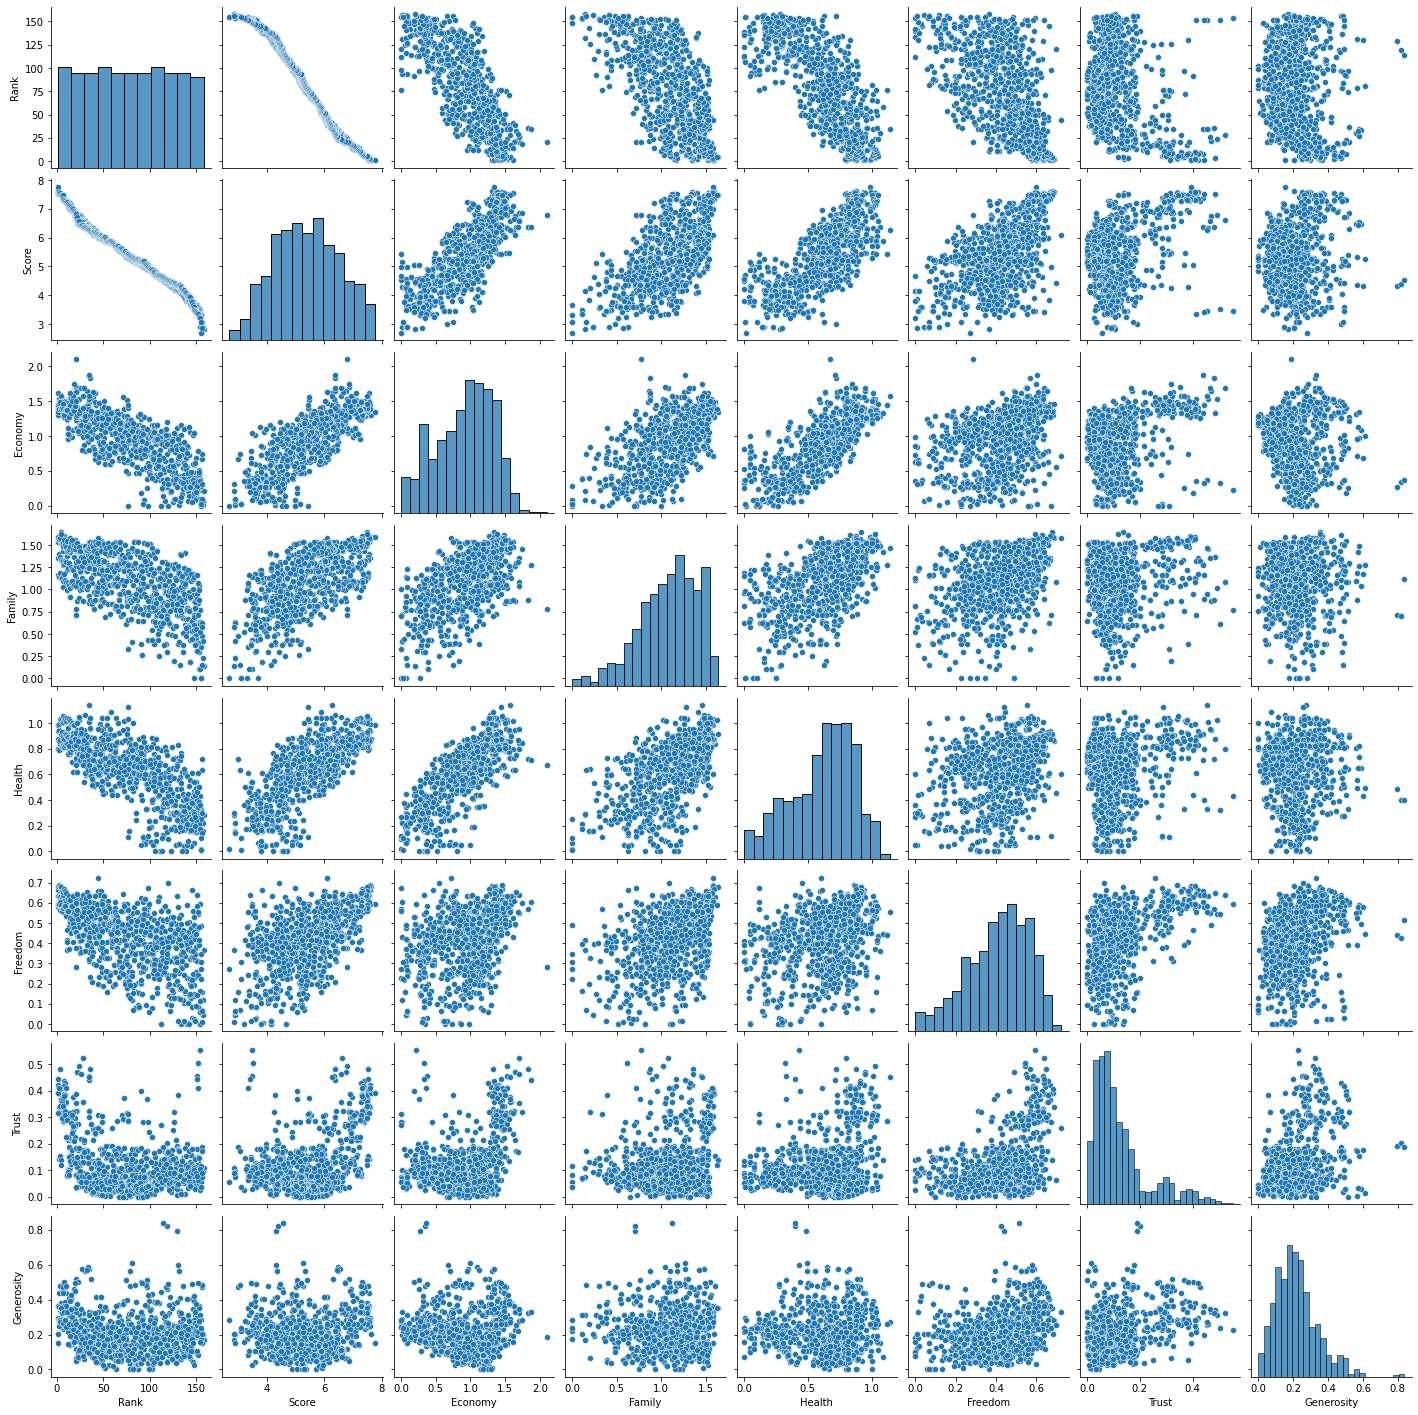

In [242]:
sns.pairplot(df.drop(columns=["Year"]))